In [1]:
pip install ndlib 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 9.4 MB/s 
     |████████████████████████████████| 3.1 MB 44.1 MB/s 
  Created wheel for python-igraph: filename=python_igraph-0.9.11-py3-none-any.whl size=9074 sha256=4207d934bca467fb7bf831100c357b5b45c49c5ca02afdf94917a6d8507d044e
  Stored in directory: /root/.cache/pip/wheels/7d/e4/0c/0c83f70bd0b99ce8aea47a21f8e52502169e7dd17808d12f30
Successfully built python-igraph


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import pandas as pd
import networkx as nx
from sklearn.cluster import KMeans
import numpy as np 
from math import *

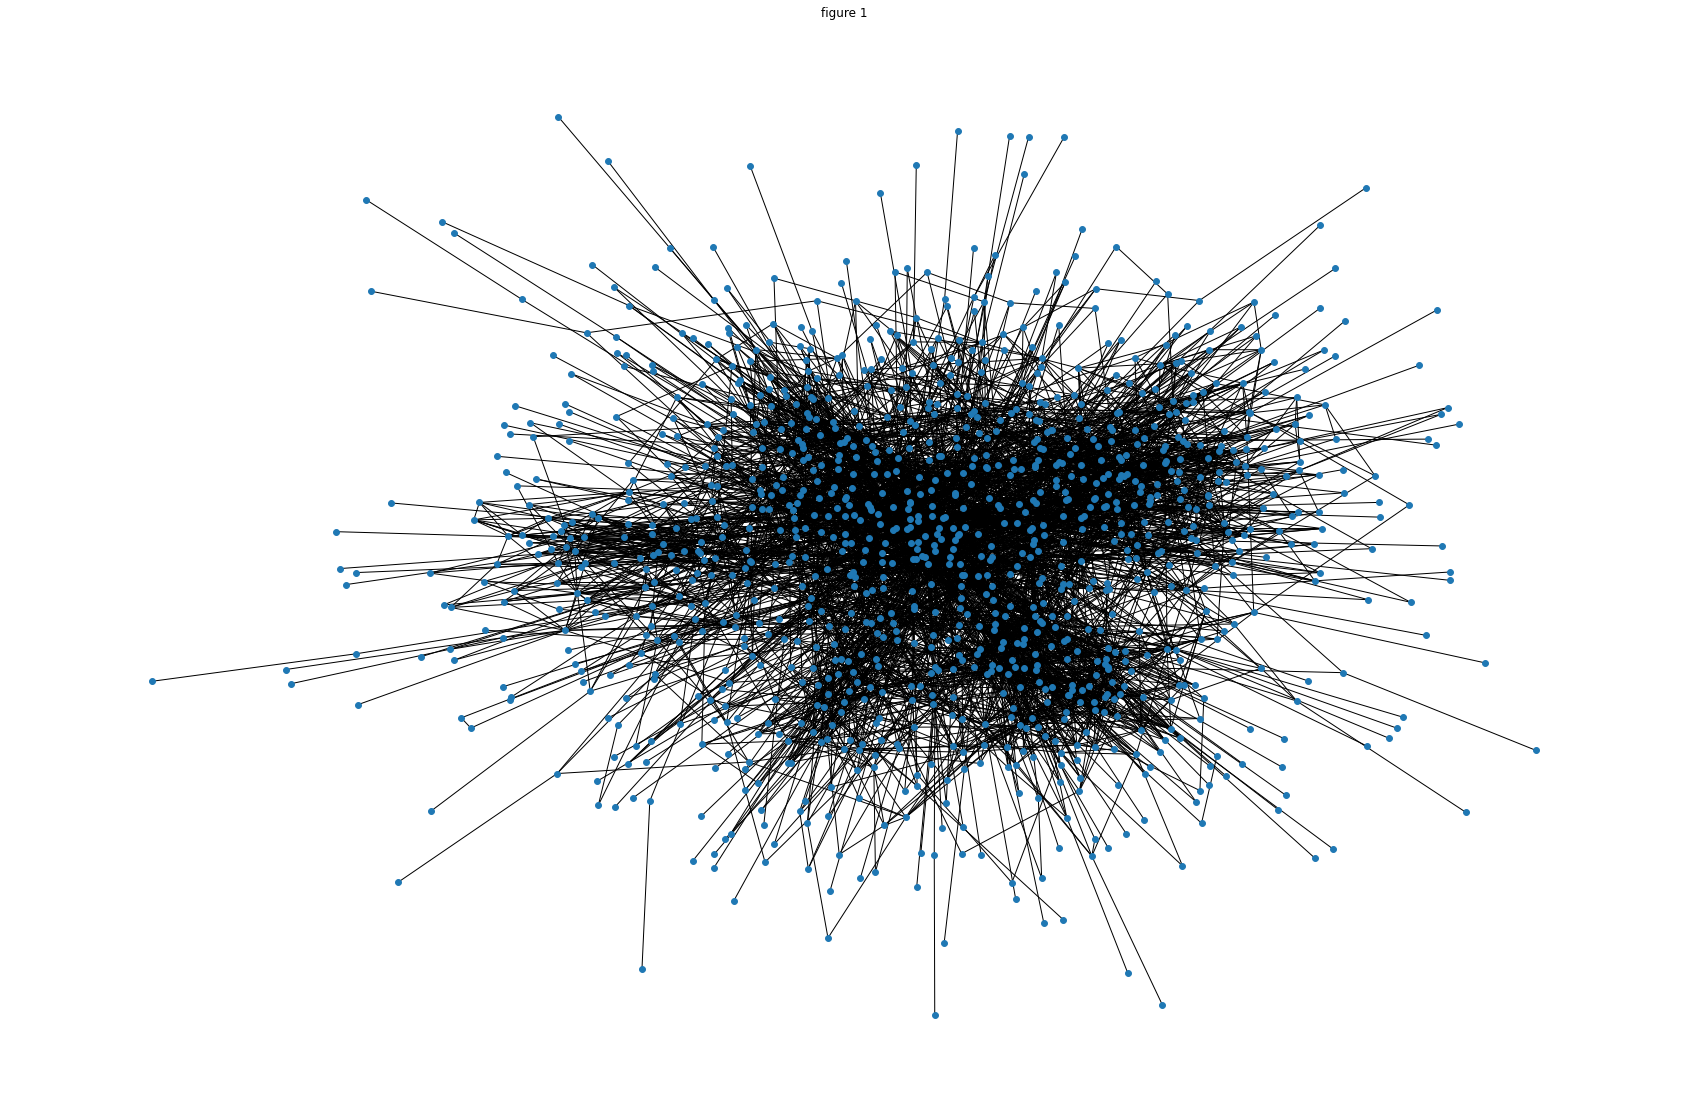

In [4]:
plt.figure(figsize=(30,20))
G=nx.read_edgelist('Email.txt',create_using=nx.Graph(),nodetype=int)
sp=nx.spring_layout(G)

nx.draw_networkx(G,pos=sp,with_labels=False,node_size=35)
plt.title('figure 1')

plt.axis('off')

plt.show()

In [5]:
def TOPSIS(G1):
    betCent = nx.betweenness_centrality(G1)
    closCent = nx.closeness_centrality(G1)
    degCent = nx.degree_centrality(G1)
    eigCent = nx.eigenvector_centrality(G1)


    BC = []
    DC = []
    EC = []
    CC = []

    for i in sorted(betCent):
        BC.append(betCent[i])

    for i in sorted(closCent):
        CC.append(closCent[i])

    for i in sorted(degCent):
        DC.append(degCent[i])

    for i in sorted(eigCent):
        EC.append(eigCent[i])


    mat = pd.DataFrame({'DC' : DC,
                        'CC' : CC,
                        'BC' : BC,
                        'EC' : EC})


    DC_denom = sqrt((mat['DC']**2).sum())
    CC_denom = sqrt((mat['CC']**2).sum())
    BC_denom = sqrt((mat['BC']**2).sum())
    EC_denom = sqrt((mat['EC']**2).sum())

  

    mat_norm = pd.DataFrame({
        'DC' : mat['DC'] / DC_denom,
        'CC' : mat['CC'] / CC_denom,
        'BC' : mat['BC'] / BC_denom,
        'EC' : mat['EC'] / EC_denom,
    })

  

    mat_norm_weighted = mat_norm

    mat_norm_weighted['DC'] = mat_norm_weighted['DC'] * 0.2
    mat_norm_weighted['EC'] = mat_norm_weighted['EC'] * 0.2
    mat_norm_weighted['BC'] = mat_norm_weighted['BC'] * 0.3
    mat_norm_weighted['CC'] = mat_norm_weighted['CC'] * 0.3

 

    DC_ideal_best = mat_norm_weighted['DC'].max()
    DC_ideal_worst = mat_norm_weighted['DC'].min()

    CC_ideal_best = mat_norm_weighted['CC'].max()
    CC_ideal_worst = mat_norm_weighted['CC'].min()

    BC_ideal_best = mat_norm_weighted['BC'].max()
    BC_ideal_worst = mat_norm_weighted['BC'].min()

    EC_ideal_best = mat_norm_weighted['EC'].max()
    EC_ideal_worst = mat_norm_weighted['EC'].min()

    

    mat_norm_weighted["from_best"] = (mat_norm_weighted["DC"] - DC_ideal_best)**2 + (mat_norm_weighted['CC'] - CC_ideal_best)**2 + (mat_norm_weighted['BC'] - BC_ideal_best)**2 + (mat_norm_weighted['EC'] - EC_ideal_best)**2
    mat_norm_weighted["from_worst"] = (mat_norm_weighted["DC"] - DC_ideal_worst)**2 + (mat_norm_weighted['CC'] - CC_ideal_worst)**2 + (mat_norm_weighted['BC'] - BC_ideal_worst)**2 + (mat_norm_weighted['EC'] - EC_ideal_worst)**2

    

    mat_norm_weighted["from_best"] = mat_norm_weighted["from_best"].apply(lambda x : sqrt(x))
    mat_norm_weighted["from_worst"] = mat_norm_weighted["from_worst"].apply(lambda x : sqrt(x))

   

    mat_norm_weighted['ratio'] = mat_norm_weighted['from_worst'] / (mat_norm_weighted['from_worst'] + mat_norm_weighted['from_best'])

   

    result = mat

    result['TOPSIS'] = mat_norm_weighted['ratio']
    result.sort_values(by="TOPSIS", ascending=False ,inplace=True)

    result.reset_index(inplace=True)

    result.rename(columns={"index" : "node"}, inplace=True)

    #

    return result

In [8]:
data=TOPSIS(G)
data.to_csv("TOPSIS_result_Email.csv", index = False)

In [9]:
data

,node,DC,CC,BC,EC,TOPSIS
0,104,0.062721,0.378216,0.036931,0.229103,0.949770
1,332,0.045936,0.382820,0.039490,0.123657,0.774723
2,22,0.045053,0.381659,0.033463,0.116593,0.719794
3,41,0.045053,0.377585,0.026024,0.131570,0.643457
4,75,0.037986,0.374339,0.030118,0.082444,0.622879
...,...,...,...,...,...,...
1128,1131,0.000883,0.189965,0.000000,0.000040,0.002720
1129,1124,0.000883,0.186154,0.000000,0.000025,0.001392
1130,1130,0.000883,0.185513,0.000000,0.000022,0.001168
1131,1051,0.000883,0.184545,0.000000,0.000030,0.000831
